In [169]:
import pandas as pd
import numpy as np
import os

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

In [170]:
import itertools

In [171]:
import tensorflow as tf
from tensorflow.keras import layers, models

from tensorflow.keras.preprocessing.image import ImageDataGenerator 
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras import regularizers

import warnings

# warnings.filterwarnings("ignore", category=UserWarning, message=r"Your `PyDataset` class should call `super().__init__\(\*\*kwargs\)`")


### Data analysis and visualization

In [173]:
df = pd.read_csv("./data/Training_set.csv")
df.head(10)

filename                     label
0   Image_1.jpg          SOUTHERN DOGFACE
1   Image_2.jpg                    ADONIS
2   Image_3.jpg            BROWN SIPROETA
3   Image_4.jpg                   MONARCH
4   Image_5.jpg  GREEN CELLED CATTLEHEART
5   Image_6.jpg           CAIRNS BIRDWING
6   Image_7.jpg  GREEN CELLED CATTLEHEART
7   Image_8.jpg      EASTERN DAPPLE WHITE
8   Image_9.jpg            BROWN SIPROETA
9  Image_10.jpg               RED POSTMAN

In [174]:
len(df)

6499

## Visualizing the distribution of butterfly classes

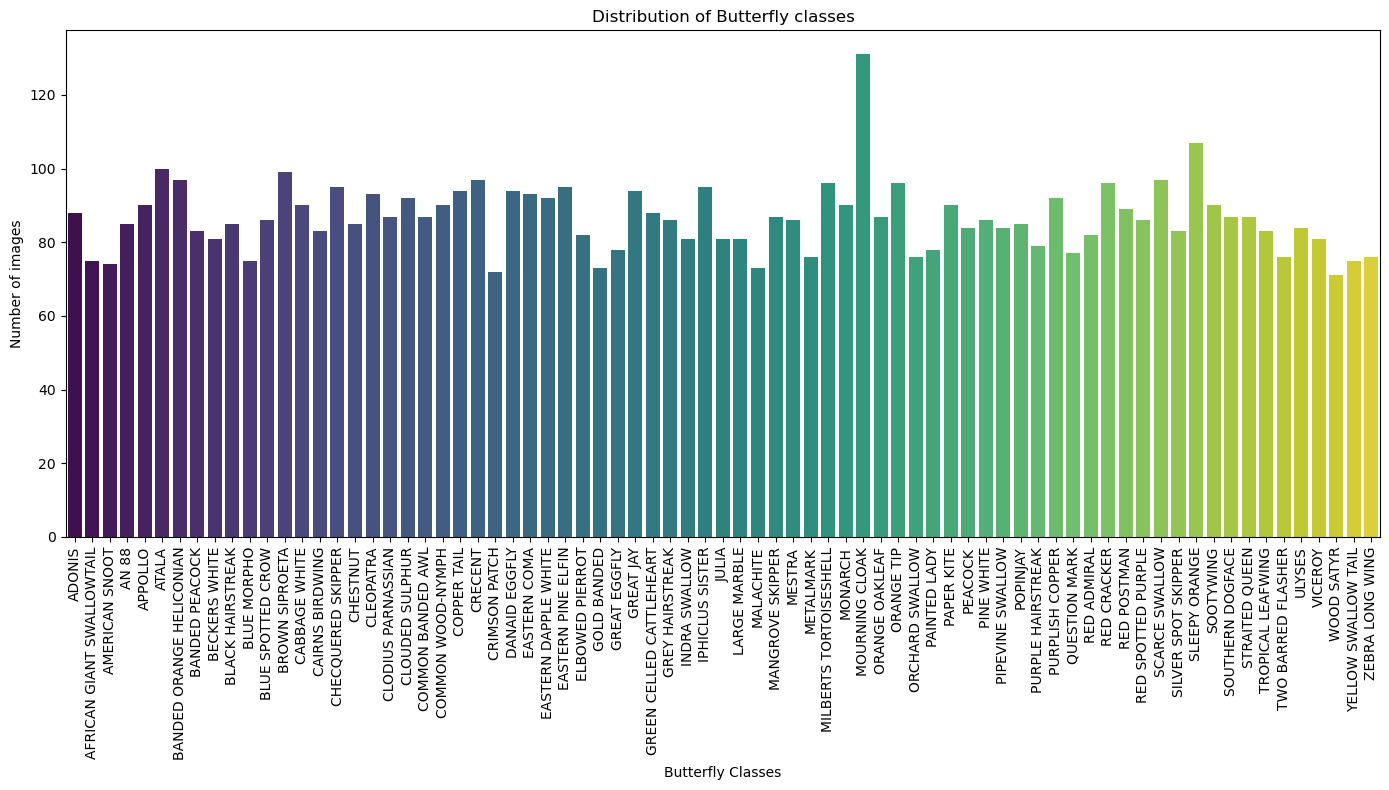

In [176]:
class_counts = df['label'].value_counts().sort_index()

plt.figure(figsize=(14,8))
sns.barplot(x=class_counts.index, y=class_counts.values, hue=class_counts.index, legend=False, palette='viridis')
plt.title('Distribution of Butterfly classes')
plt.xlabel('Butterfly Classes')
plt.ylabel('Number of images')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

### Visualizig in pie chart

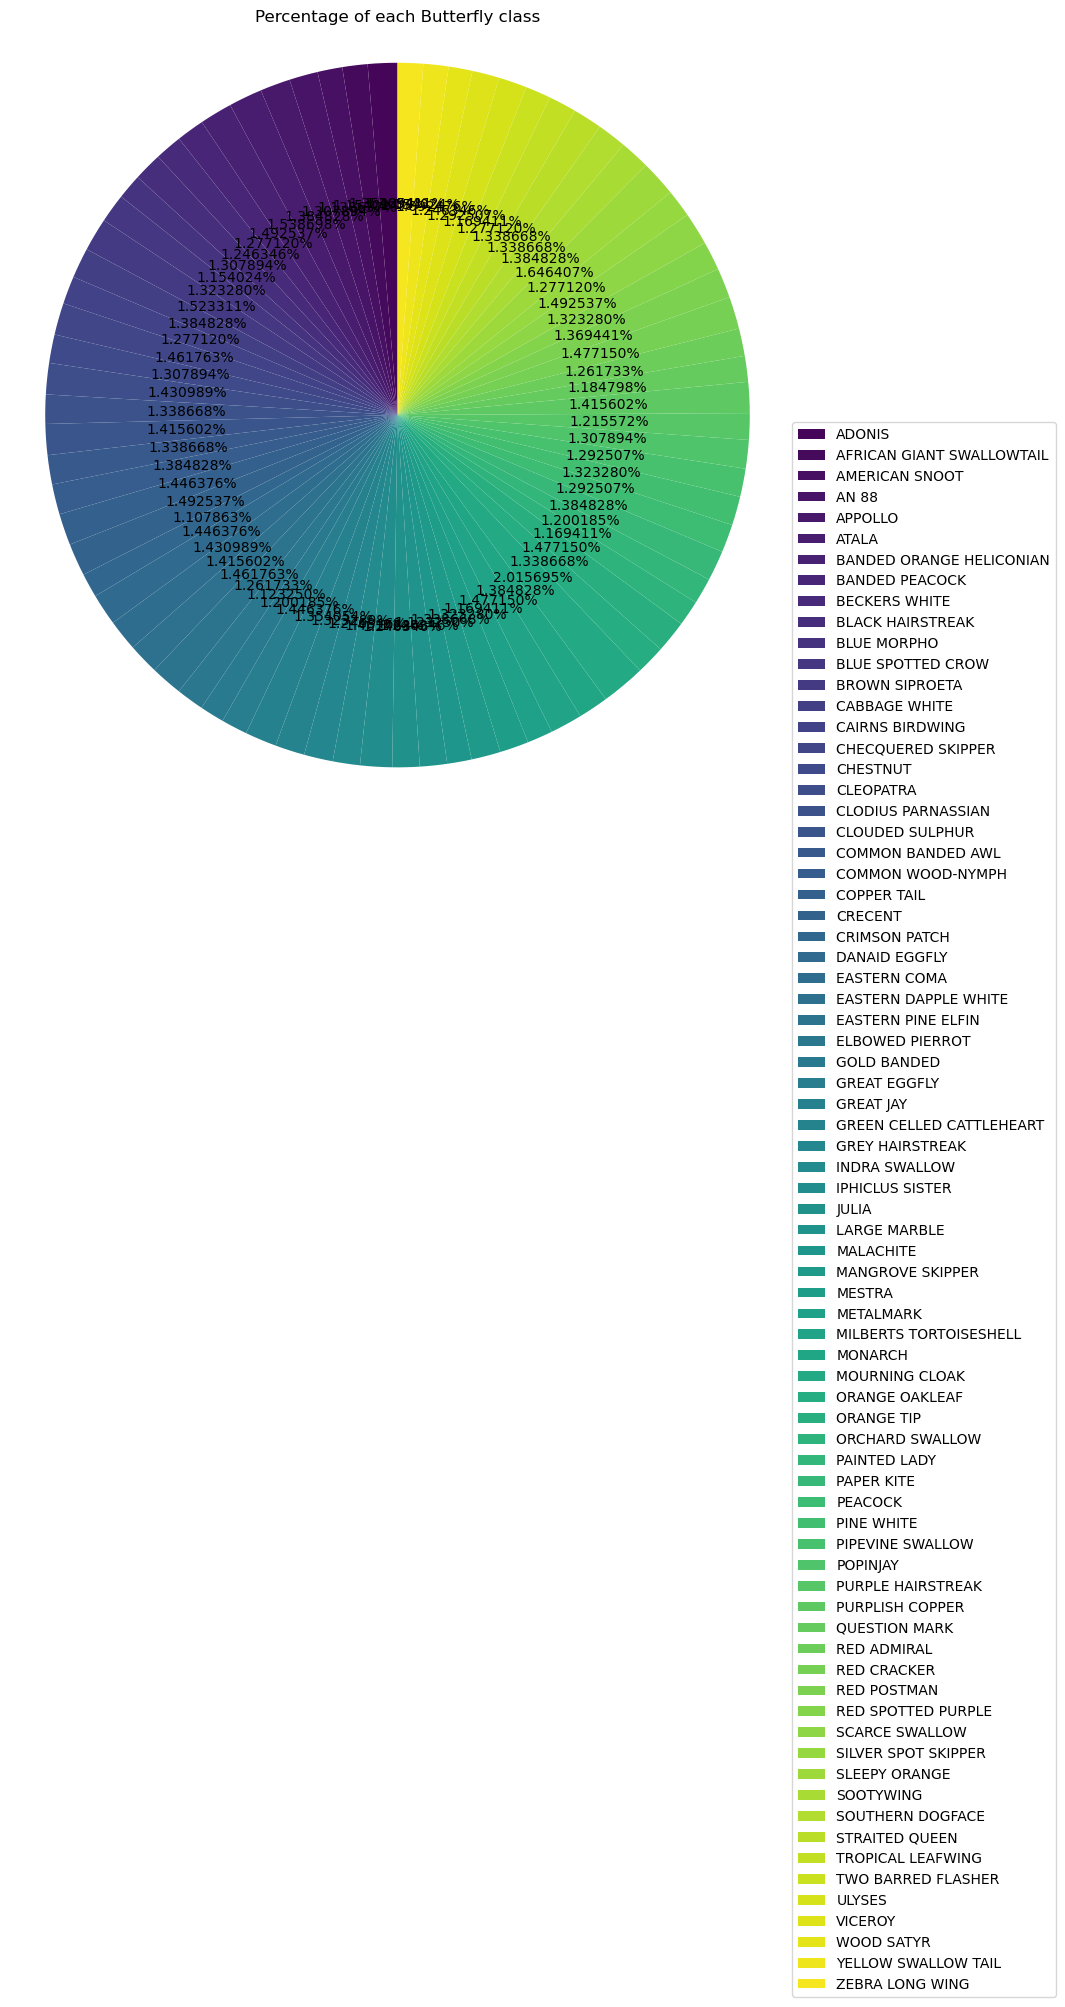

In [178]:
colors = sns.color_palette("viridis", len(class_counts))
class_counts = df['label'].value_counts().sort_index()

plt.figure(figsize=(10,10))
plt.pie(class_counts.values, labels=None, autopct='%1f%%', startangle=90, colors=colors)
plt.title('Percentage of each Butterfly class')
plt.axis('equal')    # equal aspect ratio ensures that pie is drawn as circle
plt.legend(class_counts.index, loc="best", bbox_to_anchor=(1, 0.5))
plt.show()


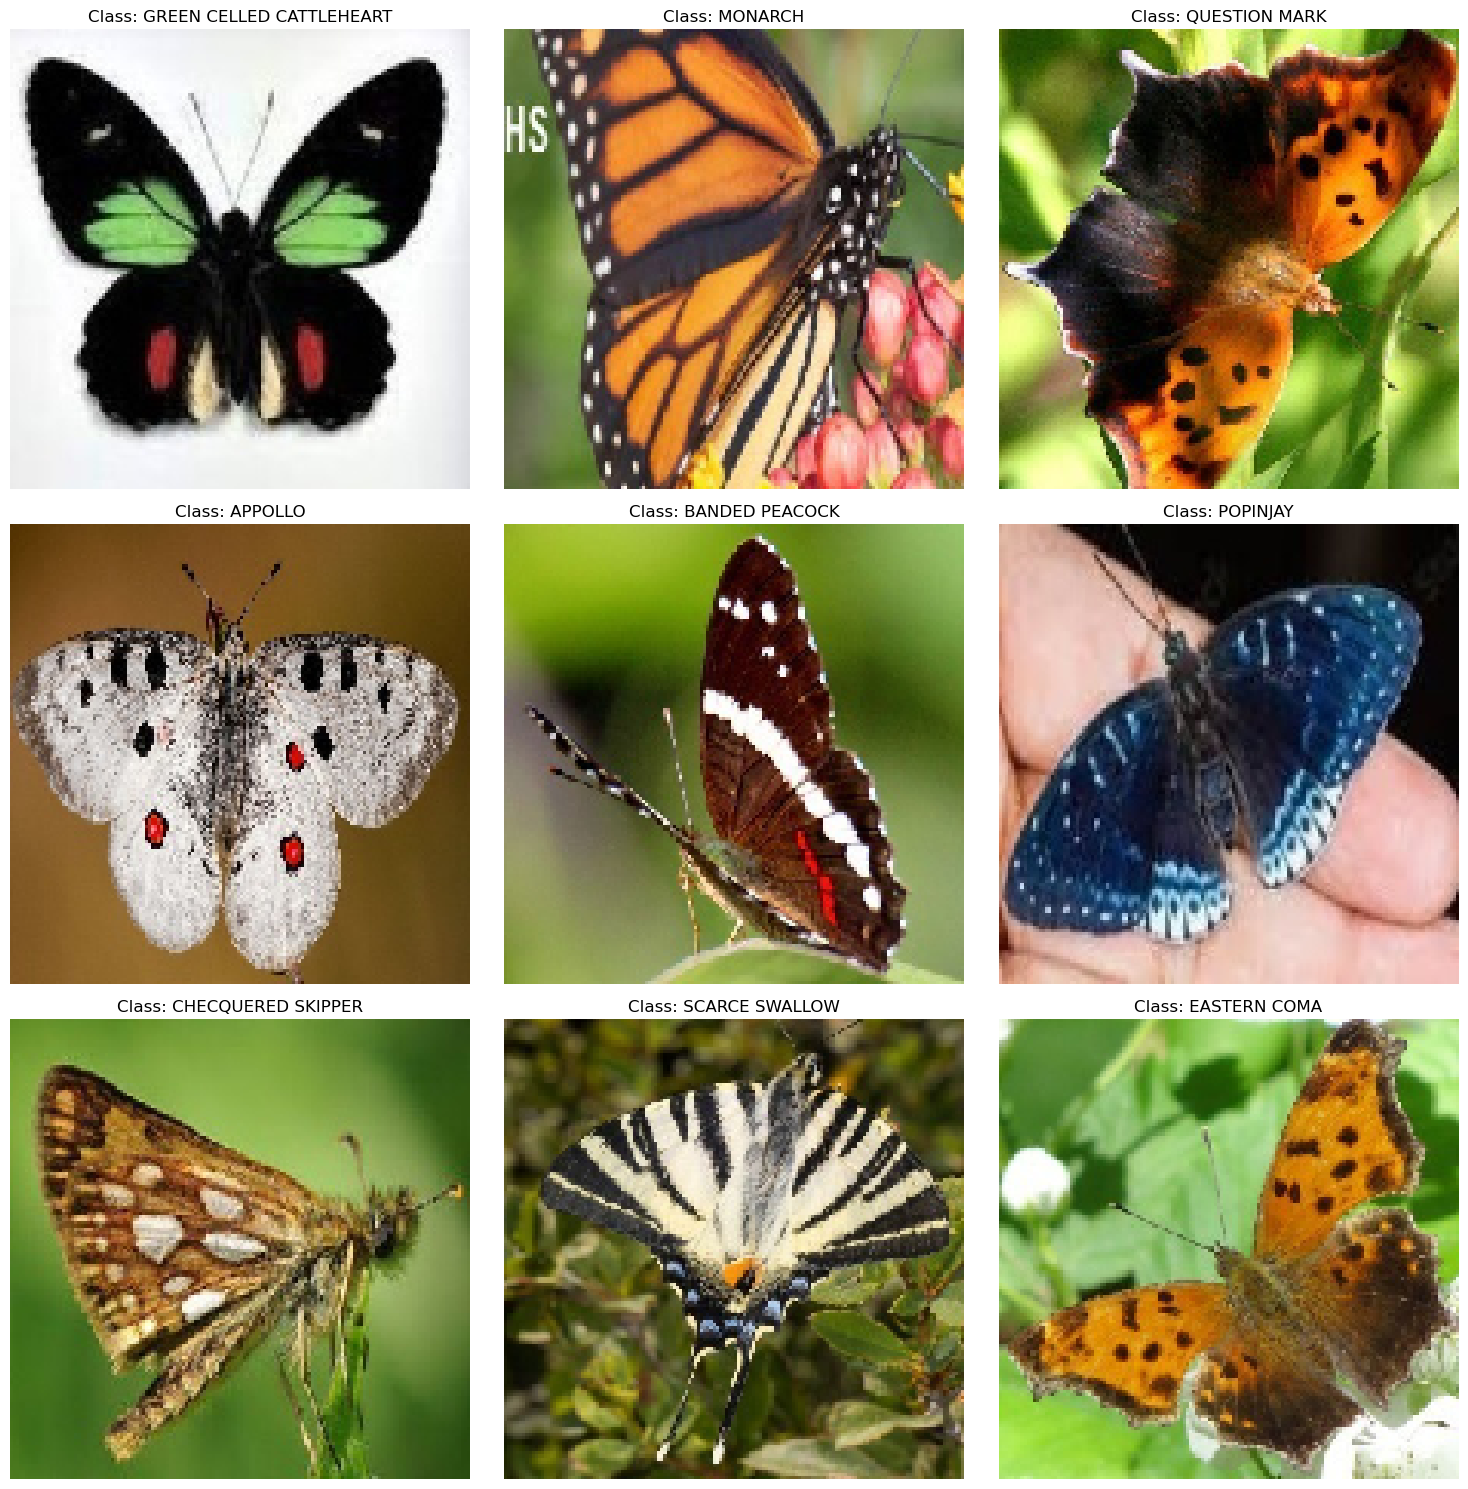

In [179]:
image_dir = "./data/train"

sample_images = df.sample(9, random_state=42)

fig, axes = plt.subplots(3, 3, figsize=(15,15))

for i, (index, row) in enumerate(sample_images.iterrows()):
    img_path = os.path.join(image_dir, row['filename'])
    img = load_img(img_path, target_size=(150, 150))
    img_array = img_to_array(img) / 255.0    # normalize the image
    
    ax= axes[i // 3, i % 3]
    ax.imshow(img_array)
    ax.set_title(f"Class: {row['label']}")
    ax.axis('off')

plt.tight_layout()
plt.show()

## Splitting the dataset

In [181]:
train_df, val_df = train_test_split(df, test_size=0.2, random_state=42)

image_dir = "./data/train"

train_datagen = ImageDataGenerator(
    rescale = 1./255,
    rotation_range = 40,
    width_shift_range = 0.2,
    height_shift_range = 0.2,
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True,
    fill_mode = 'nearest'
)

val_datagen = ImageDataGenerator(rescale=1./255)

train_generator = val_datagen.flow_from_dataframe(
    dataframe = train_df,
    directory = image_dir,
    x_col = 'filename',
    y_col = 'label',
    target_size = (150, 150),
    batch_size = 32,
    class_mode = 'categorical'
)

val_generator = val_datagen.flow_from_dataframe(
    dataframe = val_df,
    directory = image_dir,
    x_col = 'filename',
    y_col = 'label',
    target_size = (150, 150),
    batch_size = 32,
    class_mode = 'categorical'
)


Found 5199 validated image filenames belonging to 75 classes.
Found 1300 validated image filenames belonging to 75 classes.


## Building the model

In [183]:
model_CNN = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.Dense(75, activation='softmax')
])

model_CNN.compile(optimizer='adam',
                 loss='categorical_crossentropy',
                 metrics=['accuracy'])

model_CNN.summary()

C:\Users\Nemo\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_17 (Conv2D)                   │ (None, 148, 148, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_15 (MaxPooling2D)      │ (None, 74, 74, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_18 (Conv2D)                   │ (None, 72, 72, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_16 (MaxPooling2D)      │ (None, 36, 36, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_19 (Conv2D)                   │ (None, 34, 34, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_17 (MaxPooling2D)      │ (None, 17, 17, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_3 (Flatten)                  │ (None, 36992)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 512)                 │      18,940,416 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 75)                  │          38,475 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 19,072,139 (72.75 MB)

 Trainable params: 19,072,139 (72.75 MB)

 Non-trainable params: 0 (0.00 B)

In [184]:
history = model_CNN.fit(
    train_generator,
    steps_per_epoch = train_generator.samples // train_generator.batch_size,
    epochs=30,
    validation_data = val_generator,
    validation_steps = val_generator.samples // val_generator.batch_size
)

C:\Users\Nemo\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/30
162/162 ━━━━━━━━━━━━━━━━━━━━ 103s 625ms/step - accuracy: 0.0823 - loss: 3.9685 - val_accuracy: 0.3289 - val_loss: 2.5546
Epoch 2/30
  1/162 ━━━━━━━━━━━━━━━━━━━━ 1:08 424ms/step - accuracy: 0.2500 - loss: 3.1330

C:\Users\Nemo\anaconda3\Lib\site-packages\keras\src\trainers\epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


162/162 ━━━━━━━━━━━━━━━━━━━━ 4s 23ms/step - accuracy: 0.2500 - loss: 3.1330 - val_accuracy: 0.3305 - val_loss: 2.5612
Epoch 3/30
162/162 ━━━━━━━━━━━━━━━━━━━━ 73s 452ms/step - accuracy: 0.5019 - loss: 1.8524 - val_accuracy: 0.4742 - val_loss: 1.9940
Epoch 4/30
162/162 ━━━━━━━━━━━━━━━━━━━━ 4s 22ms/step - accuracy: 0.6250 - loss: 1.3433 - val_accuracy: 0.4727 - val_loss: 2.0350
Epoch 5/30
162/162 ━━━━━━━━━━━━━━━━━━━━ 72s 446ms/step - accuracy: 0.7906 - loss: 0.7575 - val_accuracy: 0.4977 - val_loss: 2.0902
Epoch 6/30
162/162 ━━━━━━━━━━━━━━━━━━━━ 4s 23ms/step - accuracy: 0.7500 - loss: 0.8004 - val_accuracy: 0.5055 - val_loss: 2.0724
Epoch 7/30
162/162 ━━━━━━━━━━━━━━━━━━━━ 72s 447ms/step - accuracy: 0.9218 - loss: 0.2737 - val_accuracy: 0.4695 - val_loss: 2.8475
Epoch 8/30
162/162 ━━━━━━━━━━━━━━━━━━━━ 4s 23ms/step - accuracy: 0.9062 - loss: 0.1975 - val_accuracy: 0.4812 - val_loss: 2.8034
Epoch 9/30
162/162 ━━━━━━━━━━━━━━━━━━━━ 72s 444ms/step - accuracy: 0.9661 - loss: 0.1270 - val_accurac

## Evaluating the model

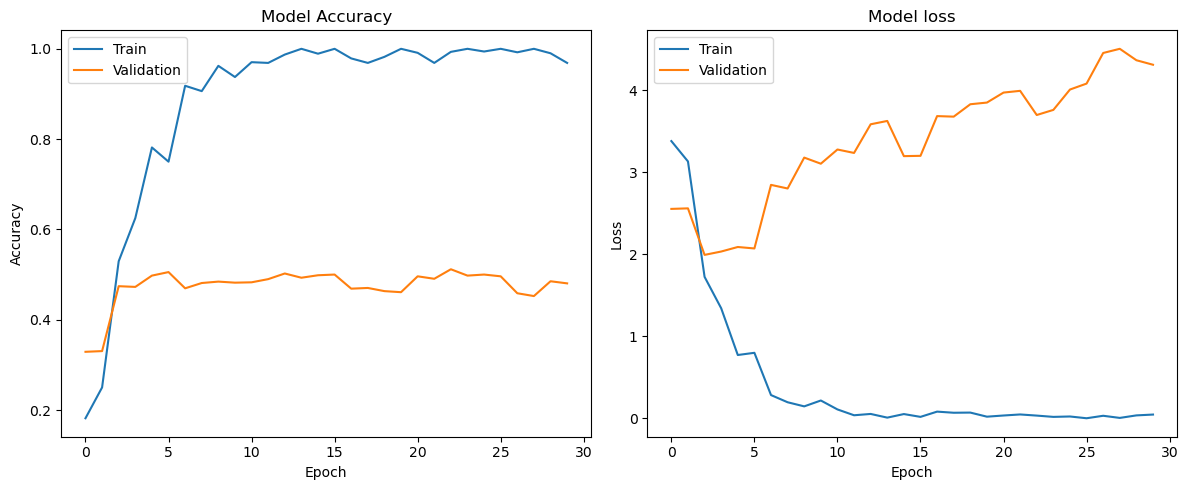

In [222]:
plt.figure(figsize=(12,5))

# for accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# for loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.tight_layout()
plt.show()

## Testing

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step


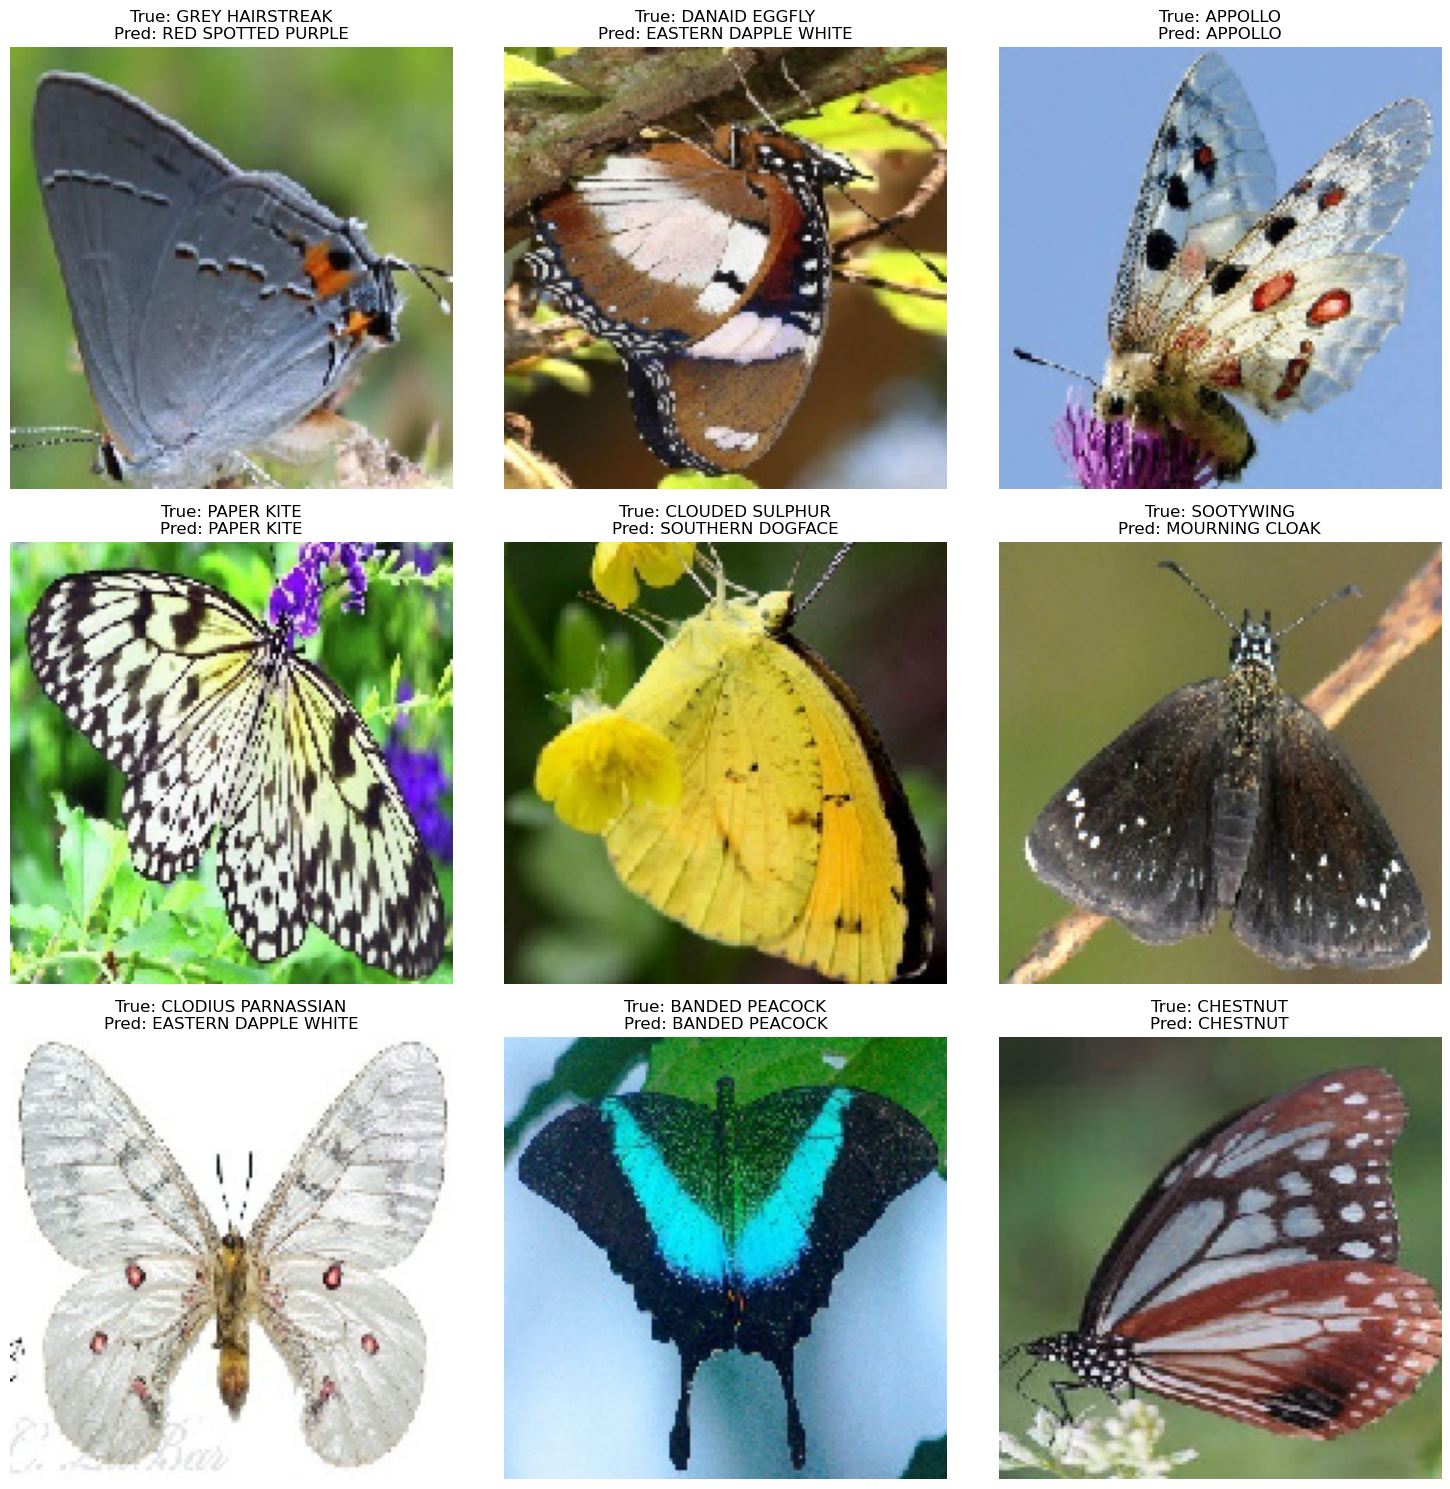

In [252]:
val_images, val_labels = next(val_generator)

pred_labels = model_CNN.predict(val_images)
pred_labels = np.argmax(pred_labels, axis=1)
true_labels = np.argmax(val_labels, axis=1)

class_indices = val_generator.class_indices
class_names = {v: k for k, v in class_indices.items()}

def display_images(images, true_labels, pred_labels, class_names, num_images=9):
    plt.figure(figsize=(15, 15))
    for i in range(num_images):
        plt.subplot(3, 3, i+1)
        plt.imshow(images[i])
        true_label = class_names[int(true_labels[i])]
        pred_label = class_names[int(pred_labels[i])]
        plt.title(f"True: {true_label}\nPred: {pred_label}")
        plt.axis('off')
    plt.tight_layout()
    plt.show()

display_images(val_images, true_labels, pred_labels, class_names, num_images=9)

# Conclusion
### The system was able to achieve the accuracy score of about 96%. However, during testing the syatem performs worse.